In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [3]:

X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 120
Testing set size: 30


In [4]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [5]:
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%


In [6]:
svm_rbf = SVC(kernel='rbf')
svm_poly = SVC(kernel='poly', degree=3)
svm_sigmoid = SVC(kernel='sigmoid')

svm_rbf.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)
svm_sigmoid.fit(X_train, y_train)

print("RBF Kernel Accuracy:", svm_rbf.score(X_test, y_test))
print("Polynomial Kernel Accuracy:", svm_poly.score(X_test, y_test))
print("Sigmoid Kernel Accuracy:", svm_sigmoid.score(X_test, y_test))


RBF Kernel Accuracy: 1.0
Polynomial Kernel Accuracy: 1.0
Sigmoid Kernel Accuracy: 0.3


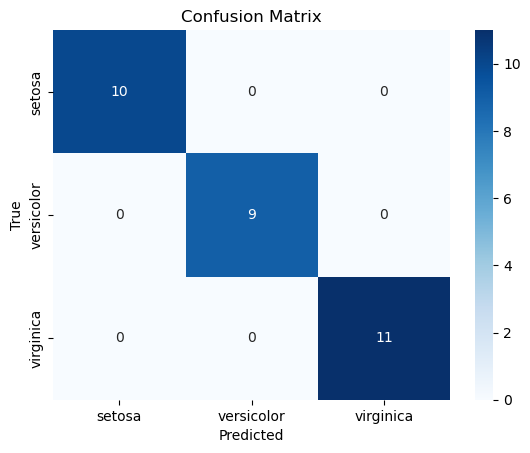

In [7]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


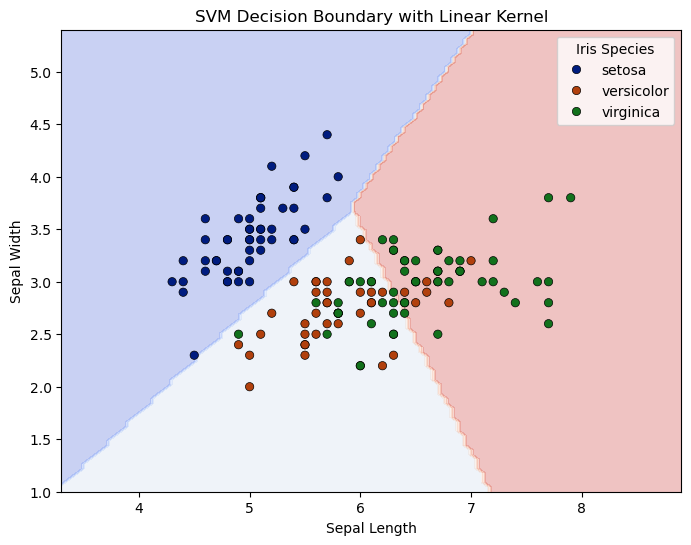

In [8]:
iris = datasets.load_iris()
X = iris.data[:, :2]  
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

Z = svm_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y], palette='dark', edgecolor='k')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('SVM Decision Boundary with Linear Kernel')
plt.legend(title='Iris Species')
plt.show()


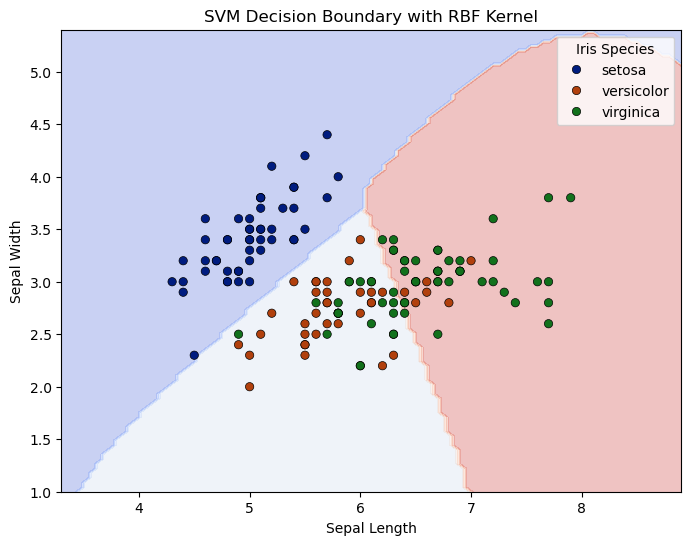

In [9]:
iris = datasets.load_iris()
X = iris.data[:, :2]  
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_rbf = SVC(kernel='rbf', gamma='scale')  # RBF kernel
svm_rbf.fit(X_train, y_train)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

Z = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y], palette='dark', edgecolor='k')

# Labels and title
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('SVM Decision Boundary with RBF Kernel')
plt.legend(title='Iris Species')
plt.show()


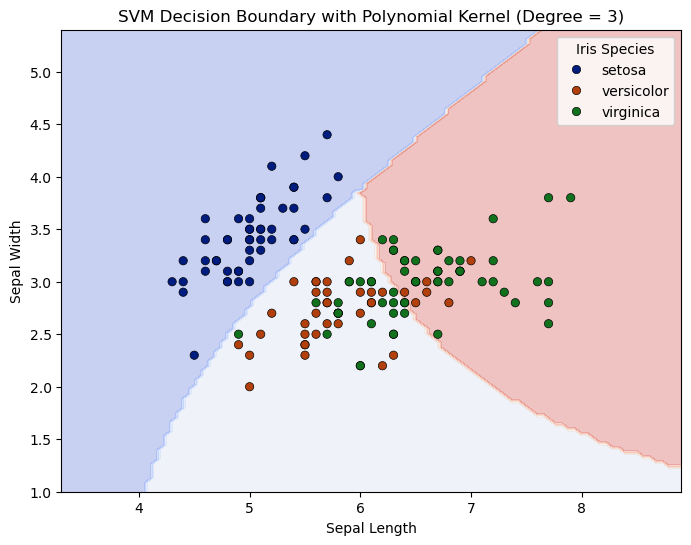

In [10]:
iris = datasets.load_iris()
X = iris.data[:, :2] 
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_poly = SVC(kernel='poly', degree=3, gamma='scale')
svm_poly.fit(X_train, y_train)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

Z = svm_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y], palette='dark', edgecolor='k')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('SVM Decision Boundary with Polynomial Kernel (Degree = 3)')
plt.legend(title='Iris Species')
plt.show()
